# PL01 - CLASSIFICAÇÃO

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Configurações para melhor visualização
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Carregar o dataset
df_imoveis= pd.read_csv("dataset_imoveis_ml.csv")

In [4]:
# identificar colunas a exluir (cidade manter)
colunas_identificacao = ['id_imovel','preco']
colunas_target = ['preco_categoria']
colunas_remover = colunas_identificacao + colunas_target
colunas_remover

['id_imovel', 'preco', 'preco_categoria']

In [5]:
# separar features e target
x = df_imoveis.iloc[:, :-1].values
y = df_imoveis.iloc[:, -1].values

In [6]:
# criar o x
x = df_imoveis.drop(columns = colunas_remover)

In [7]:
# Nas colunas de texto aplicar o One Hot Encoding - Imprimir n.º de colunas originais e após o One Hot Encoding
colunas_texto = x.select_dtypes(include=['object']).columns.tolist()
x = pd.get_dummies(x, columns = colunas_texto, drop_first = True)

print(f"Após One Hot Encoding: N.º de colunas: {x.shape[1]}")

Após One Hot Encoding: N.º de colunas: 49


In [8]:
# codificar o y
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
# Dividir os dados em treino e teste (70% treino, 30% teste, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [10]:
#normalizar os dados
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [11]:
# Inicializar o modelo
modelo_lr = LogisticRegression(
    random_state = 42,
    max_iter = 1000
)

In [12]:
# Treinar o modelo
modelo_lr.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
# Fazer previsões
y_pred_lr = modelo_lr.predict(x_test_scaled)

In [14]:
# Accuracy e matriz de confusão logistic regression
acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr,)
print(f"Accuracy: {acc_lr :.2%}")
print("Confusion Matrix:")
print(cm_lr)

Accuracy: 92.33%
Confusion Matrix:
[[156   0  15]
 [  0 210  11]
 [  8  12 188]]


In [15]:
# Relatório por classe
print(classification_report(y_test, y_pred_lr, target_names=['Alto', 'Médio', 'Baixo']))

              precision    recall  f1-score   support

        Alto       0.95      0.91      0.93       171
       Médio       0.95      0.95      0.95       221
       Baixo       0.88      0.90      0.89       208

    accuracy                           0.92       600
   macro avg       0.93      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



# Qual métrica considera mais relevante para este problema e porquê?

### A métrica mais importante será o F1-SCORE porque demonstra um equilibrio entre as classes todas uma vez que também nao favorecemos nenhuma em especifico.

In [16]:
# Criar o modelo
modelo_dt = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state = 42
)

In [17]:
# Treinar o modelo
modelo_dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
# fazer previsões
y_pred_dt = modelo_dt.predict(x_test)

In [19]:
#classificação report
print(classification_report(y_test, y_pred_dt, target_names=['Alto', 'Médio', 'Baixo']))

              precision    recall  f1-score   support

        Alto       0.76      0.85      0.80       171
       Médio       0.83      0.85      0.84       221
       Baixo       0.68      0.59      0.63       208

    accuracy                           0.76       600
   macro avg       0.75      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



In [20]:
# Accuracy e matriz de confusão decision tree

acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Accuracy: {acc_dt :.2%}")
print("Confusion Matrix:")
print(cm_dt)

Accuracy: 76.00%
Confusion Matrix:
[[146   0  25]
 [  0 187  34]
 [ 46  39 123]]


In [21]:
# Visualizar a árvore de decisão

tree_rules = export_text(modelo_dt, feature_names=list(x.columns), max_depth=5)
print(tree_rules)


|--- area_m2 <= 91.50
|   |--- tipo_imovel_Estúdio <= 0.50
|   |   |--- distancia_centro_km <= 6.85
|   |   |   |--- ano_construcao <= 1993.50
|   |   |   |   |--- tipo_imovel_Duplex <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- tipo_imovel_Duplex >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- ano_construcao >  1993.50
|   |   |   |   |--- distancia_centro_km <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- distancia_centro_km >  3.10
|   |   |   |   |   |--- class: 2
|   |   |--- distancia_centro_km >  6.85
|   |   |   |--- class: 1
|   |--- tipo_imovel_Estúdio >  0.50
|   |   |--- zona_Zona Premium <= 0.50
|   |   |   |--- estado_conservacao_Novo <= 0.50
|   |   |   |   |--- certificacao_energetica_F <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- certificacao_energetica_F >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- estado_conservacao_Novo >  0.50
|   |   |   |   |--- distancia_centro_km <= 3.70
|   |   |   |   

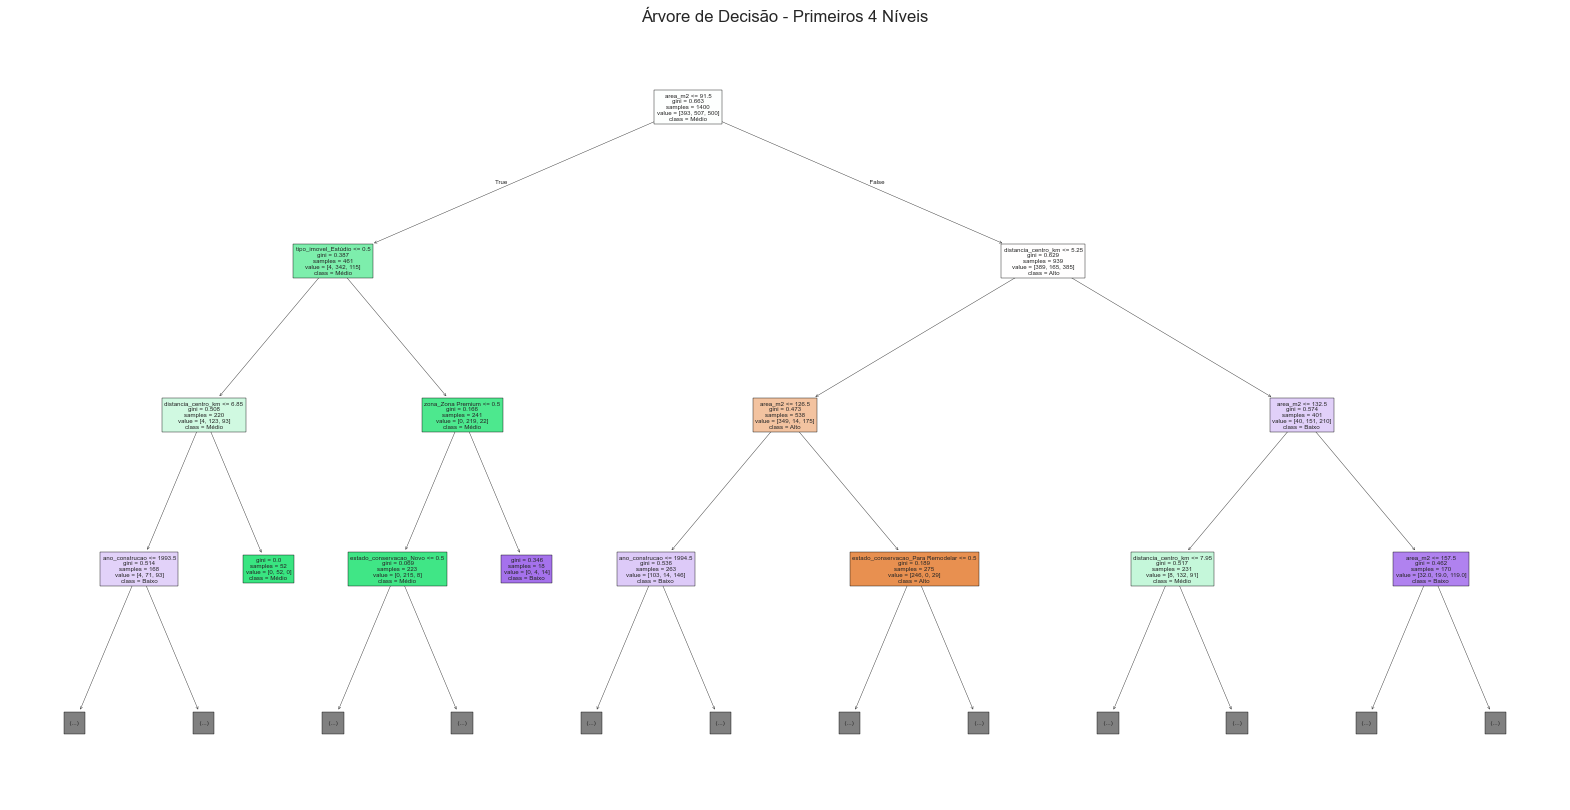

In [22]:
# Visualizar a árvore (se o ambiente suportar)
try:
    plt.figure(figsize=(20, 10))
    plot_tree(modelo_dt, 
              feature_names=x.columns,
              class_names=['Alto', 'Médio', 'Baixo'],
              filled=True,
              max_depth=3)
    plt.title("Árvore de Decisão - Primeiros 4 Níveis")
    plt.show()
except:
    print("(Visualização gráfica não disponível neste ambiente)")

In [23]:
# Comparar os modelos


modelos = {
    'Regressão Logística': y_pred_lr,
    'Árvore de Decisão': y_pred_dt
}

print(f"{'Modelo':<20}      {'Accuracy':<10}      {'Precision':<10}      {'Recall':<10}      {'F1-Score':<10}")
for nome, y_pred in modelos.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"{nome:<20}       {acc:.2%}           {prec:.2%}        {rec:.2%}           {f1:.2%}")

Modelo                    Accuracy        Precision       Recall          F1-Score  
Regressão Logística        92.33%           92.41%        92.33%           92.35%
Árvore de Decisão          76.00%           75.58%        76.00%           75.61%


# Existe alguma classe onde um modelo é claramente superior?

### sim, o regressão logística é claramente superior

# Qual modelo teve melhor desempenho global? Tem alguma justificação?


### o modelo com melhor desempenho global é a Regressão Logística, pois obteve métricas de classificação significativamente melhores

In [24]:
# Novo imóvel a prever

novo_imovel = pd.DataFrame([{
    "area_m2": 150,
    "tipo_imovel": "Penthouse",      # Luxo = Penthouse
    "zona": "Zona Premium"
}])


for col in x.columns:
    if col not in novo_imovel.columns:
        novo_imovel[col] = 0  # ou algum valor padrão


novo_imovel_encoded = pd.get_dummies(novo_imovel, drop_first=True)


novo_imovel_encoded = novo_imovel_encoded.reindex(columns=x.columns, fill_value=0)


pred_log = modelo_lr.predict(novo_imovel_encoded)[0]
pred_tree = modelo_dt.predict(novo_imovel_encoded)[0]
print(pred_log, pred_tree)

print("\n=== Previsão para novo imóvel REGRESSÃO LOGISTICA ===")
if pred_log == 0:
    print("Regressão Logística: Alto")
elif pred_log == 1:
    print("Regressão Logística: Médio")
elif pred_log == 2:
    print("Regressão Logística: Baixo")


print("\n=== Previsão para novo imóvel ARVORE DE DECISÃO ===")
if pred_tree == 0:
    print("Árvore de Decisão: Alto")
elif pred_tree == 1:
    print("Árvore de Decisão: Médio")
elif pred_tree == 2:
    print("Árvore de Decisão: Baixo")


0 0

=== Previsão para novo imóvel REGRESSÃO LOGISTICA ===
Regressão Logística: Alto

=== Previsão para novo imóvel ARVORE DE DECISÃO ===
Árvore de Decisão: Alto


c:\Users\ruida\Documents\DEV\IA LVL 2\UFCD 2\PL01\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Em que categoria cada modelo classifica este imóvel?

### AMBOS OS MODELOS CLASSIFICAARAM O MOVEL COMO ALTO

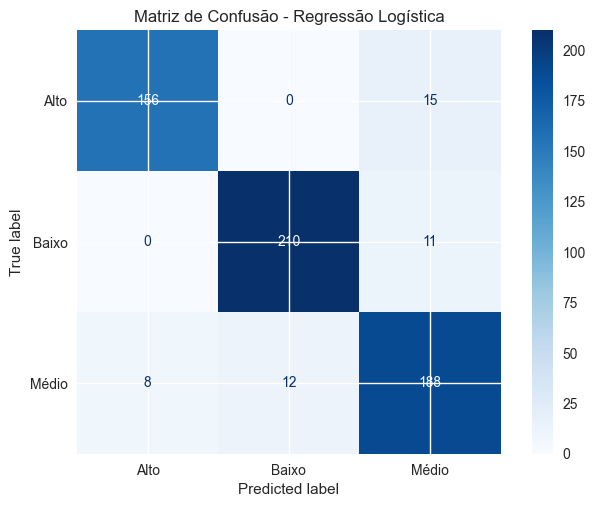

In [25]:
# Matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# Com base na matriz de confusão:
# Entre que categorias o modelo mais se confunde?
### 12 amostras verdadeiras "Médio" foram classificadas como "Baixo"

# Calcular precision e recall específicos para a categoria "Alto"

In [26]:
true_positives = cm_lr[0, 0]  # Verdadeiros positivos para a classe "Alto"

false_positives = cm_lr[:, 0].sum() - true_positives  # Falsos positivos para a classe "Alto"

false_negatives = cm_lr[0, :].sum() - true_positives  # Falsos negativos para a classe "Alto"

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")

Precision: 95.12%
Recall: 91.23%


# Se o objetivo fosse identificar imóveis de luxo (Alto), o modelo seria adequado?

### O modelo de Regressão Logística é adequado para identificar imóveis de luxo, pois tem alta precisão e recall para a categoria "Alto".

# Que implicações práticas teria usar este modelo na agência?

### Melhor foco em imóveis de luxo
### Com alta precisão e recall para "Alto", o modelo ajuda a agência a identificar rapidamente imóveis de luxo, facilitando o direcionamento de esforços e recursos para esses imóveis — que geralmente têm maior valor e comissão.